**Artifical Intelligence and the World: Module 3**

#3.0: Introduction

*The hard work in data science comes from transforming data, and the modelling is just a .fit() mostly.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Today, we use the Diamonds dataset from kaggle.*

In [ ]:
df_in = sns.load_dataset(name = 'diamonds')

In [ ]:
df_in.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


*As usual, we start by checking for null values and unique number of values!*

In [ ]:
df_in.isnull().sum()  #no NaN to report

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df_in.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

*But if we look carefully, there are several different types of colours and cuts... lots of features? We use the method value_counts() to check*

In [ ]:
df_in['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df_in['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

*The color is represented by a 1-7 scale, so we CAN map it using the map function in Python. Note that the input is a dictionary.*

In [ ]:
df_in['color_mapped'] = df_in['color'].map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7})
print(df_in['color'], df_in['color_mapped'])

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object 0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color_mapped, Length: 53940, dtype: int64


In [ ]:
### Mandatory exercise, import the diamonds dataset and map the 'cut' column to numbers 1 to 5, Note that ideal is better than premium and fair is the worst
## make a new column of 'cut_mapped'

In [ ]:
df_in['cut_mapped'] = df_in['cut'].map({'Ideal':1, 'Premium':2, 'Very Good':3, 'Good':4, 'Fair':5})
df_in['cut_mapped']

0        1
1        2
2        4
3        2
4        4
        ..
53935    1
53936    4
53937    3
53938    2
53939    1
Name: cut_mapped, Length: 53940, dtype: int64

*The 1+2 = 3 problem still exists though, so we will just revert to Booleans instead.*

In [ ]:
df_in['is_Ideal'] = (df_in['cut'] == 'Ideal') 
df_in['is_Premium'] = (df_in['cut'] == 'Premium') 
df_in['is_Very Good'] = (df_in['cut'] == 'Very Good') 
df_in['is_Good'] = (df_in['cut'] == 'Good') 
df_in['is_Fair'] = (df_in['cut'] == 'Fair') 

In [ ]:
df_in

,carat,cut,color,clarity,depth,table,price,x,y,z,color_mapped,cut_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,True,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,2,False,True,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,4,False,False,False,True,False
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,6,2,False,True,False,False,False
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,1,True,False,False,False,False
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,4,False,False,False,True,False
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,3,False,False,True,False,False
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,5,2,False,True,False,False,False


*Now just drop the redundant columns and the dataset is good to go! :)*

In [ ]:
df_inputfinal = df_in.drop(columns = ['color', 'cut', 'clarity'])
df_inputfinal

,carat,depth,table,price,x,y,z,color_mapped,cut_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,4,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,2,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,4,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,1,True,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,4,False,False,False,True,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,3,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,5,2,False,True,False,False,False


#3.1: First Model, First Errors

*Let's start by taking our input and plotting things with it.*

In [ ]:
df_inputfinal.head()

,carat,depth,table,price,x,y,z,color_mapped,cut_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,4,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,2,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,4,False,False,False,True,False


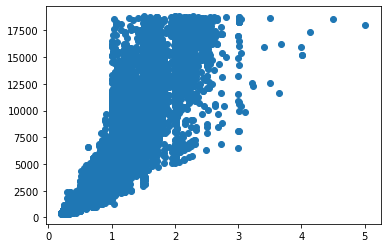

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df_inputfinal['carat'], df_inputfinal['price'])
fig.show()

*So there is a clear correlation, which hopefully other features can help us develop. But for now, an estimate: let's say a carat is $1000 or so.*

In [ ]:
df_inputfinal['carat']*1000  #gives us our estimated prices by carat

0        230.0
1        210.0
2        230.0
3        290.0
4        310.0
         ...  
53935    720.0
53936    720.0
53937    700.0
53938    860.0
53939    750.0
Name: carat, Length: 53940, dtype: float64

In [ ]:
first_pred = df_inputfinal['carat']*1000
true_price = df_inputfinal['price']

*So we have created a linear prediction. But how to test the accuracy? Well, we can look at the errors, i.e. the differences in prediction and true price for EACH diamond (each row).*

In [ ]:
first_errors = true_price - first_pred
first_errors

0          96.0
1         116.0
2          97.0
3          44.0
4          25.0
          ...  
53935    2037.0
53936    2037.0
53937    2057.0
53938    1897.0
53939    2007.0
Length: 53940, dtype: float64

In [ ]:
first_errors.sum()

169094347.0

In [ ]:
first_errors.mean()

3134.8599740452355

*This first average error will be a BASELINE, but we would like to develop our model more... so let's add a depth estimate.*

In [ ]:
second_pred = df_inputfinal['carat']*1000 + df_inputfinal['depth']*50.7674

In [ ]:
second_errors = true_price - second_pred
second_errors.mean()

0.003236012962857267

*This seems... suspicious. Let's plot and figure things out, ideally a plot of true_price vs second_pred would be like y = x.*

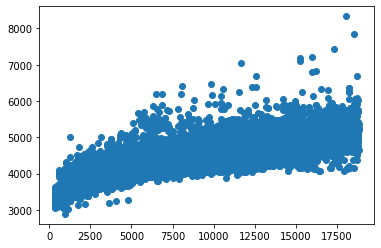

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_price, second_pred)
fig.show()

##yeah no something's up.

*The issue is that the AVERAGE error is near zero, but there are a large amount of other error values. Plot a histogram to see this.*

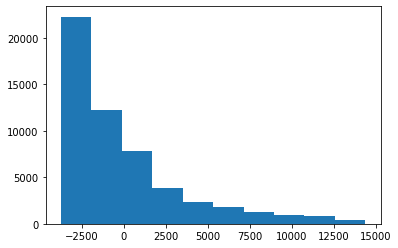

In [ ]:
fig, ax = plt.subplots()
ax.hist(second_errors)
fig.show()

*So, let's find the mean absolute error instead by taking a modulus...*

In [ ]:
second_errors.abs().mean()  #yeah that's better

2668.7929961551176

*We can also find a mean square error, in which we square the difference to make everything positive. The input will still be the real y values against the predictions.*

In [ ]:
second_errors_squared = second_errors ** 2
second_errors_squared.mean()

12667965.057203509

*We can use the sklearn imported error functions to do the work for us.*

In [ ]:
mean_absolute_error(y_true = true_price, y_pred = second_pred)

2668.7929961553577

In [ ]:
mean_squared_error(y_true = true_price, y_pred = second_pred)

12667965.057203408

In [ ]:
## EASY CHALLENGE: find the two kinds of errors from our first set of predicition (first_pred) 
## using the functions we imported!
## first_pred = df_inputfinal['carat']*1000
## Were we better off? 

In [ ]:
mean_absolute_error(y_true = true_price, y_pred = first_pred)

3134.8599740452355

In [ ]:
mean_squared_error(y_true = true_price, y_pred = first_pred)

22481897.803911753

In [ ]:
##nah, not really better off, both models suck.

#3.2: Into Linear Models

*Given a bunch of features and coefficients (using everything we can from our dataset), our job is to reduce the mean squared error as much as possible. To do that, we'll employ the help of a new SKLearn object.*

In [ ]:
first_linear_model = linear_model.LinearRegression()

*This regression will require an array to be passed in, but we can easily convert the DataFrame into one using .values*

In [ ]:
df_inputfinal.values

array([[0.23, 61.5, 55.0, ..., False, False, False],
       [0.21, 59.8, 61.0, ..., False, False, False],
       [0.23, 56.9, 65.0, ..., False, True, False],
       ...,
       [0.7, 62.8, 60.0, ..., True, False, False],
       [0.86, 61.0, 58.0, ..., False, False, False],
       [0.75, 62.2, 55.0, ..., False, False, False]], dtype=object)

*We will use the .fit() function, which requires a two-dimensional X input, as well as a y input.*

In [ ]:
first_linear_model.fit(X = df_inputfinal.values, y = true_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Now we use the .predict() method AFTER the .fit() or it won't have the y value data from the fit embedded to help with predicting. This function will give the predicted diamond price values.*

In [ ]:
first_linear_model.predict(X = df_inputfinal.values)  #returns an array

array([ 326.,  326.,  327., ..., 2757., 2757., 2757.])

In [ ]:
model_predictions = first_linear_model.predict(X = df_inputfinal.values)

*Now we check out the error and... wait what. Ok, something seems wrong... unless?*

In [ ]:
mean_squared_error(y_true = true_price, y_pred = model_predictions)

8.71282726830483e-25

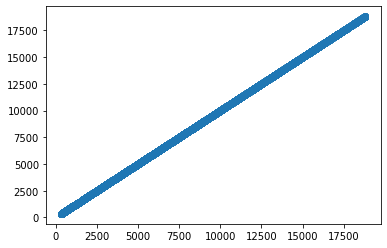

In [ ]:
fig, ax = plt.subplots()
ax.scatter(model_predictions, true_price)
fig.show()  #oh my

*But, there is a problem. Check the coefficients out for a sec.*

In [ ]:
first_linear_model.coef_   #the fourth coefficient is the only large one

array([-3.77913435e-12, -1.03805853e-13,  4.16620812e-14,  1.00000000e+00,
       -2.07783010e-14,  3.87423383e-15, -1.73954818e-15,  5.26312392e-15,
       -9.64648554e-16, -7.61666256e-15,  1.55732242e-14, -5.70281004e-15,
       -3.88273635e-15,  1.62898412e-15])

In [ ]:
df_inputfinal.head() #the fourth corresponds to price... rofl

,carat,depth,table,price,x,y,z,color_mapped,cut_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,4,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,2,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,4,False,False,False,True,False


In [ ]:
## MANDATORY EXERCISE, FIX THE df_inputfinal MATRIX, its a silly mistake but a common one. 
## then make a prediction again and check the error actual error of the model

In [ ]:
df_fix = df_inputfinal.drop(columns = 'price')

In [ ]:
second_linear_model = linear_model.LinearRegression()
second_linear_model.fit(X = df_fix.values, y = true_price)

second_model_predictions = second_linear_model.predict(X = df_fix.values)
second_model_predictions

array([ 661.4128749 ,  183.20903802,  100.21420953, ..., 3359.53973706,
       3727.64936183, 4207.63025879])

In [ ]:
second_linear_model.coef_  #looks more normal... pog?

array([11142.95983074,  -117.04723909,   -44.300395  , -1346.31049172,
          41.12616406,    23.59799089,  -258.59304467,  -292.16705685,
         -88.7751227 ,   -57.31985019,   277.17580611,   264.87548599,
        -395.95631921])

In [ ]:
mean_squared_error(y_true = true_price, y_pred = second_model_predictions)

2015588.9150325437

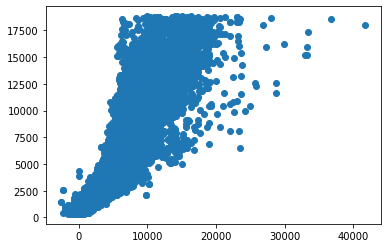

In [ ]:
fig, ax = plt.subplots()
ax.scatter(second_model_predictions, true_price)
fig.show()

#3.3: The Most Common Mistake

*The most common problem in ML... overfitting. Let's cut right to the chase and bring back the cars dataset, removing mpg because we are looking to predict it.*

In [ ]:
df_carsin = sns.load_dataset("mpg")
df_cars = df_carsin.dropna().copy()
df_cars['weight_to_hp_ratio'] = df_cars['horsepower'] / df_cars['weight']
df_cars['is_usa'] = (df_cars['origin'] == 'usa')
df_cars['is_europe'] = (df_cars['origin'] == 'europe')
df_cars['is_japan'] = (df_cars['origin'] == 'japan')
df_cars = df_cars.drop(columns = ['name','weight_to_hp_ratio','origin'])

In [ ]:
true_mpg = df_cars['mpg']
df_cars = df_cars.drop(columns = 'mpg')
df_cars.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,is_usa,is_europe,is_japan
0,8,307.0,130.0,3504,12.0,70,True,False,False
1,8,350.0,165.0,3693,11.5,70,True,False,False
2,8,318.0,150.0,3436,11.0,70,True,False,False
3,8,304.0,150.0,3433,12.0,70,True,False,False
4,8,302.0,140.0,3449,10.5,70,True,False,False


*Once again, let's make a linear model with this data.*

In [ ]:
cars_linear_model = linear_model.LinearRegression()

In [ ]:
cars_linear_model.fit(X = df_cars.values, y = true_mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
first_mpg_predictions = cars_linear_model.predict(X = df_cars.values)

In [ ]:
mean_squared_error(y_true = true_mpg, y_pred = first_mpg_predictions)

10.682121627762635

*Pretty good! Now let's plot it and see what's up*

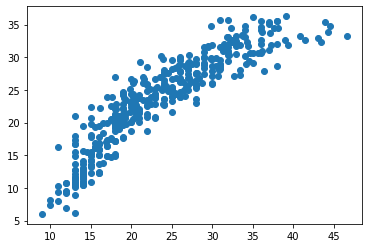

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_mpg, first_mpg_predictions)
fig.show()

*What if we tried to improve our model by... encoding car names? Yeah there's a lot but why not right?*

In [ ]:
import sklearn.preprocessing as skpre 
df_in2 = df_carsin.dropna().copy()
encoder = skpre.OneHotEncoder()
encoder.fit(X = df_in2[['origin', 'name']].values)

array = encoder.transform(X = df_in2[['origin','name']].values).toarray() 
df_encoded= pd.DataFrame(data = array, index = df_in2.index, columns = encoder.get_feature_names())
df_carsmerged = pd.concat(objs = [df_in2, df_encoded], axis = 1)

df_carsnames= df_carsmerged.drop(columns = ['origin', 'name'])
df_carsnames

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,x0_europe,x0_japan,x0_usa,x1_amc ambassador brougham,x1_amc ambassador dpl,x1_amc ambassador sst,x1_amc concord,x1_amc concord d/l,x1_amc concord dl 6,x1_amc gremlin,x1_amc hornet,x1_amc hornet sportabout (sw),x1_amc matador,x1_amc matador (sw),x1_amc pacer,x1_amc pacer d/l,x1_amc rebel sst,x1_amc spirit dl,x1_audi 100 ls,x1_audi 100ls,x1_audi 4000,x1_audi 5000,x1_audi 5000s (diesel),x1_audi fox,x1_bmw 2002,x1_bmw 320i,x1_buick century,x1_buick century 350,x1_buick century limited,x1_buick century luxus (sw),x1_buick century special,x1_buick electra 225 custom,x1_buick estate wagon (sw),...,x1_toyota celica gt liftback,x1_toyota corolla,x1_toyota corolla 1200,x1_toyota corolla 1600 (sw),x1_toyota corolla liftback,x1_toyota corolla tercel,x1_toyota corona,x1_toyota corona hardtop,x1_toyota corona liftback,x1_toyota corona mark ii,x1_toyota cressida,x1_toyota mark ii,x1_toyota starlet,x1_toyota tercel,x1_toyouta corona mark ii (sw),x1_triumph tr7 coupe,x1_vokswagen rabbit,x1_volkswagen 1131 deluxe sedan,x1_volkswagen 411 (sw),x1_volkswagen dasher,x1_volkswagen jetta,x1_volkswagen model 111,x1_volkswagen rabbit,x1_volkswagen rabbit custom,x1_volkswagen rabbit custom diesel,x1_volkswagen rabbit l,x1_volkswagen scirocco,x1_volkswagen super beetle,x1_volkswagen type 3,x1_volvo 144ea,x1_volvo 145e (sw),x1_volvo 244dl,x1_volvo 245,x1_volvo 264gl,x1_volvo diesel,x1_vw dasher (diesel),x1_vw pickup,x1_vw rabbit,x1_vw rabbit c (diesel),x1_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

*Let's now take this encoded thingy where the car names are now columns and make a linear model with it*

In [ ]:
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = df_carsnames.values, y = true_mpg )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
second_mpg_predictions = cars_linear_model_2.predict(X = df_carsnames.values)

In [ ]:
mean_squared_error(true_mpg, second_mpg_predictions)

1.6438895312677044e-28

*That's a really small error! Yay :D But let's plot, and then check coefficients.*

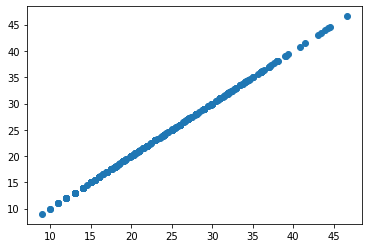

In [ ]:
fig, ax = plt.subplots()
ax.scatter(second_mpg_predictions, true_mpg)
fig.show()

In [ ]:
cars_linear_model_2.coef_

array([ 1.00000000e+00, -6.36452677e-16, -4.58268972e-17,  2.11406830e-17,
        1.41761610e-17,  3.69512690e-16, -1.71013958e-15, -1.93395695e-16,
        4.01263726e-15, -3.81924157e-15, -1.68804770e-15, -1.58169358e-14,
       -2.08489429e-15,  1.56914587e-15,  1.87442265e-15,  4.20835142e-16,
       -3.95736142e-15, -4.01983245e-15, -6.50959428e-15, -4.23636319e-15,
       -3.00330828e-15, -3.54292027e-15, -2.78289273e-15, -4.75802352e-16,
        6.76777977e-15, -3.24759012e-15, -5.79789481e-16,  4.89765275e-15,
        5.93793709e-15,  5.05404064e-16, -6.00082513e-16, -6.00652760e-15,
        5.92163654e-15,  2.45321263e-16, -2.35778316e-15,  1.14955169e-14,
       -7.05538546e-15,  1.87494336e-15, -7.55780255e-15, -3.99548870e-15,
       -8.60040604e-15,  5.82255755e-15,  9.57633058e-15, -7.17793207e-16,
        2.72224247e-15, -1.06751250e-14,  5.58949251e-15, -4.60680669e-15,
       -3.84437685e-17,  3.49538727e-15, -6.35865045e-15, -6.43027454e-15,
        8.28990136e-15, -

*This is overfitting. The model is only good for predicting on the data given, but kinda garbage at predicting for data beyond that. So instead, we will divide up our data into training data and validation data. Instead of doing it manually, we can of course just import a function to do it.*

In [ ]:
import sklearn.model_selection as skmodelselect

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20)

##NOTE: THE DATA SELECTION IS DONE RANDOMLY, SO OUR DATA WILL DIFFER
##NOTE: test_size = 0.2 means that the training/validation split is 80/20

In [ ]:
### MANDATORY CHALLENGE: INSPECT X_train, y_train, X_test, y_test ETC!!!

In [ ]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,is_usa,is_europe,is_japan
263,6,231.0,165.0,3445,13.4,78,True,False,False
153,6,250.0,105.0,3459,16.0,75,True,False,False
44,8,400.0,175.0,5140,12.0,71,True,False,False
206,4,140.0,72.0,2565,13.6,76,True,False,False
180,4,121.0,115.0,2671,13.5,75,False,True,False
...,...,...,...,...,...,...,...,...,...
173,4,119.0,97.0,2545,17.0,75,False,False,True
241,6,146.0,97.0,2815,14.5,77,False,False,True
209,4,120.0,88.0,3270,21.9,76,False,True,False
229,8,400.0,180.0,4220,11.1,77,True,False,False


In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,is_usa,is_europe,is_japan
343,4,79.0,58.0,1755,16.9,81,False,False,True
132,4,140.0,75.0,2542,17.0,74,True,False,False
33,6,232.0,100.0,2634,13.0,71,True,False,False
257,6,232.0,90.0,3210,17.2,78,True,False,False
349,4,91.0,68.0,1985,16.0,81,False,False,True
...,...,...,...,...,...,...,...,...,...
139,8,302.0,140.0,4638,16.0,74,True,False,False
158,8,318.0,150.0,4498,14.5,75,True,False,False
306,6,173.0,115.0,2595,11.3,79,True,False,False
100,6,250.0,88.0,3021,16.5,73,True,False,False


In [ ]:
y_test

263    17.7
153    18.0
44     13.0
206    26.5
180    25.0
       ... 
173    24.0
241    22.0
209    19.0
229    16.0
73     13.0
Name: mpg, Length: 79, dtype: float64

In [ ]:
y_train

343    39.1
132    25.0
33     19.0
257    19.4
349    34.1
       ... 
139    14.0
158    16.0
306    28.8
100    18.0
371    29.0
Name: mpg, Length: 313, dtype: float64

*Now to recreate the cars model, but this time with ONLY the training data.*

In [ ]:
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train.values, y = y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Now we choose to make predictions on X_test*

In [ ]:
cars_linear_model_2.predict(X = X_test)

array([21.18952284, 19.15596441,  5.63429883, 24.03680129, 25.07802915,
       36.47449607, 27.39104811, 12.07945727, 25.58982647, 23.97242063,
       28.08983229,  9.43865287, 31.39805031, 31.84251298, 30.17431682,
       13.00818928, 16.46806457, 31.45853542, 23.51390816, 23.15549713,
       34.9973526 , 11.77111442, 15.0319277 , 33.26249816, 22.09577695,
       20.9168622 , 25.67038068, 24.95340778, 30.83111724, 29.02322574,
       28.415167  , 23.3566124 , 34.77513399, 19.33715336, 22.48359846,
       33.78816446, 28.82250817, 14.74237927, 31.28292722, 24.09283787,
       27.44690064, 28.49616447, 27.59614828, 32.65709198, 20.9735741 ,
       14.70287431, 24.99089273, 31.58527941, 32.9536432 , 12.09511888,
       31.11102999, 32.82533879, 29.65473207, 26.8148562 , 10.71861438,
       17.34517537, 17.04333475, 26.13728765, 27.11454803, 21.3733997 ,
       25.90863201, 26.46531119, 24.25125731, 21.48908469, 23.39956525,
       13.59991961, 10.91550923, 23.34133624, 16.03453715, 27.94

*And check this against the y_test...*

In [ ]:
y_predicted_test = cars_linear_model_2.predict(X = X_test)

In [ ]:
mean_squared_error(y_test, y_predicted_test)

13.07389985339293

*Now, there's ONE little problem... the split taken is random, so this value changes every time you run the cell. So if we run the same lines again...*

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20)
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train.values, y = y_train.values)
y_predicted_test = cars_linear_model_2.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

14.633001406774447

*Note carefully that the errors on the testing data are higher than the errors on the training data, which should make sense.*

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20)
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train, y = y_train)

y_predicted_train = cars_linear_model_2.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)

10.514358027375147

In [ ]:
y_predicted_test = cars_linear_model_2.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

11.5477379128899

*Now we can show how overfitting is problematic... let's try using the overfitted data to do this same train/test split*

In [ ]:
df_carsnames = df_carsnames.drop(columns = 'mpg')

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_carsnames, true_mpg, test_size = 0.20)
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train, y = y_train)

y_predicted_train = cars_linear_model_2.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)  ##extraordinarily small error

1.108911560905645

In [ ]:
y_predicted_test = cars_linear_model_2.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)    ##WAY higher error

10.296342855130376

In [ ]:
## MANDATORY EXERCISE, split the DIAMONDS (df_inputfinal) dataset into training and testing data. 
## Find the error of a linear model on the testing data of 20% of the entire dataset. 

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_inputfinal, true_price, test_size = 0.2)
dia_model = linear_model.LinearRegression()
dia_model.fit(X = X_train.values, y = y_train.values)

y_predicted_train = dia_model.predict(X = X_train.values)
y_predicted_test = dia_model.predict(X = X_test.values)

mean_squared_error(y_true = y_test, y_pred = y_predicted_test)  #pretty low error yeet!

7.25941644896388e-25

#3.4: To FIX Our Model

*The main goal is to find the best possible model for the situation and adjust it to suit our needs... so let's try out the LASSO Model! This time we add a random_state variable which, when fixed to a specific value, gives the same train/test split everytime!*

In [ ]:
lasso_linear_model = linear_model.Lasso()

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_carsnames, true_mpg, test_size = 0.2, random_state = 0)

lasso_linear_model.fit(X = X_train.values, y = y_train.values)

y_predicted_train = lasso_linear_model.predict(X = X_train.values)
mean_squared_error(y_train, y_predicted_train)

11.72441335326703

In [ ]:
y_predicted_test = lasso_linear_model.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

11.919422233359253

In [ ]:
lasso_linear_model.coef_

##Most of the coefficients are zeroes! This is because the Lasso model tries to minimize:
##minimize squared error + alpha*(absolute value of all coefficients, summed) 
##which favours having a ton of zeroes

array([-0.        ,  0.        , -0.00824087, -0.00651267,  0.        ,
        0.64968408,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.  

In [ ]:
## EXERCISE, use the LASSO model df_inputfinal and investigate to see if you get the same coefficients
## as above

In [ ]:
lasso_linear_model = linear_model.Lasso()
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_inputfinal, true_price, test_size = 0.2, random_state = 0)

lasso_linear_model.fit(X = X_train.values, y = y_train.values)
y_test_predicted = lasso_linear_model.predict(X = X_test.values)

mean_squared_error(y_test, y_test_predicted)

6.245633307562782e-08

In [ ]:
lasso_linear_model.coef_

array([ 0.        , -0.        ,  0.        ,  0.99999994,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

*Now let's use the original df_cars and see how that does*

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 416)
cars_linear_model_3 = linear_model.Lasso()
cars_linear_model_3.fit(X = X_train, y = y_train)

y_predicted_train = cars_linear_model_3.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)

12.901084617225893

In [ ]:
y_predicted_test = cars_linear_model_3.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

7.33084361927002

*Now, what would happen if we changed the alpha parameter? Right now it defaults to 1.0, but if we could reduce it, then we might decrease error. Careful not to decrease too low though, or we overfit*

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 416)
cars_linear_model_3 = linear_model.Lasso(alpha = 0.001)
cars_linear_model_3.fit(X = X_train, y = y_train)
## straight to predictions
y_predicted_test = cars_linear_model_3.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

7.286100787404706

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 416)
cars_linear_model_3 = linear_model.Lasso(alpha = 0.015)
cars_linear_model_3.fit(X = X_train, y = y_train)
## straight to predictions
y_predicted_test = cars_linear_model_3.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

##it seems that a = 0.015 is a happy middle ground that minimizes error!

7.225572456065225

In [ ]:
## MANDATORY Exercise: There is another linear_model that can be adjusted with an alpha value. 
## try .linear_model.Ridge() and find the best alpha for the cars dataset 
## make sure you use .train_test_split() (keep random_state = 0)

In [ ]:
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 0)

cars_linear_model_4 = linear_model.Ridge(alpha = 0.01)  #seems that lower is better
cars_linear_model_4.fit(X = X_train, y = y_train)

y_predicted_test = cars_linear_model_4.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

10.022642615623578

#3.5: All About Validation

*Two main problems at the moment: running a cell twice, and the fact that some random states might by chance be more favourable... so we fix this, by doing K-fold validation. We break the dataset into folds, and split it into several iterations such that all of the data gets to be in the training set exactly once.*

In [ ]:
lasso_linear_model = linear_model.Lasso(alpha = 0.015)

In [ ]:
scores = skmodelselect.cross_val_score(estimator = lasso_linear_model, 
                         X = df_cars, 
                         y = true_mpg, cv = 5)  ##we test with 5 folds
#returns an array of test scores from each fold

In [ ]:
scores   #gives the R^2 coefficient of determination

array([0.5569904 , 0.69122361, 0.81255315, 0.67583356, 0.22429189])

In [ ]:
scores.mean()   #better representation than an individual score

0.5921785236102627

*Instead of an R^2, we can also request the cross_val_score() function to give us 'neg_mean_squared_error' or 'neg_mean_absolute_error' instead.*

In [ ]:
scores_2 = skmodelselect.cross_val_score(estimator = lasso_linear_model, 
                         X = df_cars, 
                         y = true_mpg, cv = 5, scoring = 'neg_mean_squared_error')
#since scoring prefers a high score, we just take the negative at the end since smaller negative will be good.

In [ ]:
scores_2.mean()

-15.153945741960749

*We now have a chunk of code we can repeat again and again to get the best value of alpha!*

In [ ]:
lasso_linear_model = linear_model.Lasso(alpha = 0.001)
scores_2 = skmodelselect.cross_val_score(estimator = lasso_linear_model, 
                         X = df_cars, 
                         y = true_mpg, cv = 5, scoring = 'neg_mean_squared_error')
scores_2.mean()

-15.10569807429592

*Luckily, there is another function we can use instead of manually testing every value of alpha ever: the validation curve.*

In [ ]:
##Validation curve inputs: model, X, y, param we investigate, param_range, folds
##outputs: array(training scores), array(testing scores)

In [ ]:
alpha_range = [0.001, 0.005, 0.01, 0.02, 0.4, 0.5]
train_scores, valid_scores = skmodelselect.validation_curve(
    estimator = linear_model.Lasso(),
    X = df_cars,
    y = true_mpg,
    param_name = 'alpha',
    param_range = alpha_range,
    cv = 5
)

In [ ]:
train_scores  #for each of the 5 folds for all 6 alphas

array([[0.8171858 , 0.82339256, 0.82208691, 0.84506924, 0.82160296],
       [0.81717997, 0.82338629, 0.82208107, 0.84506259, 0.82159241],
       [0.81716193, 0.82336673, 0.82206282, 0.84504181, 0.82155945],
       [0.81708981, 0.82328851, 0.82199606, 0.84495872, 0.82142766],
       [0.80000509, 0.80535102, 0.80377485, 0.82448854, 0.81407958],
       [0.79980924, 0.80481287, 0.80367006, 0.82434861, 0.81382938]])

*We want to use the mean (in a numpy array, row axis = 1) to get a better sense of the R^2 values*

In [ ]:
avg_train_scores = np.mean(train_scores, axis = 1)
avg_valid_scores = np.mean(valid_scores, axis = 1)

In [ ]:
avg_train_scores

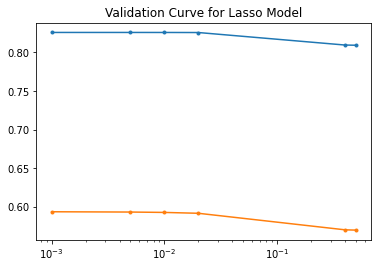

In [ ]:
##plot of the validation curve
fig, ax = plt.subplots()
ax.semilogx(alpha_range, avg_train_scores, marker = '.')
ax.semilogx(alpha_range, avg_valid_scores, marker = '.')
ax.set(title = 'Validation Curve for Lasso Model')
fig.show()

In [ ]:
## MANDATORY EXERCISE: use the lasso OR ridge model to beat the linear model you used
## on the DIAMONDS dataset 
## Then create a validation curve to find the optimal alpha value 

In [ ]:
dia_model = linear_model.Lasso(alpha = 0.015)
X_train, X_test, y_train, y_test = skmodelselect.train_test_split(df_inputfinal, true_price, test_size = 0.2)

dia_model.fit(X = X_train.values, y = y_train.values)
y_predicted_test = dia_model.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)


In [ ]:
alpha_range = np.linspace(0.01, 1, num = 100)
train_scores, valid_scores = skmodelselect.validation_curve(
    estimator = linear_model.Lasso(),
    X = df_inputfinal,
    y = true_price,
    param_name = 'alpha',
    param_range = alpha_range,
    cv = 5
)

In [ ]:
avg_train_scores = np.mean(train_scores, axis = 1)
avg_valid_scores = np.mean(valid_scores, axis = 1)

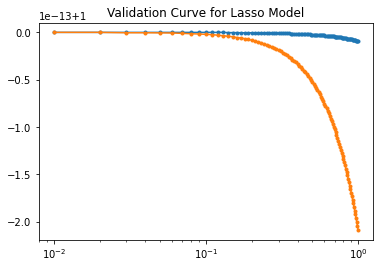

In [ ]:
##plot of the validation curve
fig, ax = plt.subplots()
ax.semilogx(alpha_range, avg_train_scores, marker = '.')
ax.semilogx(alpha_range, avg_valid_scores, marker = '.')
ax.set(title = 'Validation Curve for Lasso Model')
fig.show()